<a href="https://colab.research.google.com/github/oh-be/project4/blob/main/EnsembleWAnomoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering on Pycaret

Imports

In [ ]:
!pip install pycaret

     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 261 kB 40.3 MB/s 
     |████████████████████████████████| 1.7 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 46.3 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 116 kB 51.9 MB/s 
     |████████████████████████████████| 2.0 MB 32.4 MB/s 
     |████████████████████████████████| 16.8 MB 41.7 MB/s 
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 3.1 MB 41.1 MB/s 
     |████████████████████████████████| 10.9 MB 41.3 MB/s 
     |████████████████████████████████| 690 kB 55.7 MB/s 
     |████████████████

In [ ]:
import pandas as pd

# Dataset from zillow api 

* Dataset was cleaned in [EDA.ipynb]('EDA.ipynb')
* cook county IL filtered
* Values = mean price change over time
* index = neighborhoods (cook county IL only!!)
* columns = time = (YYYY/MM/DD) min=2000-01-31 / max=2022-02-28
* in this test we will test `chicago` individially as a beta test and determine the value of continuing with this method

In [ ]:
#import dataset
data = pd.read_csv('https://raw.githubusercontent.com/tanasijevich/project4/main/MLDatasets/anomolyML.csv')

In [ ]:
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
data

,Longitude,Latitude,SalePrice,total_tax,annual_insurance,annual_maintenance,LocationFactor
0,-88.139859,42.152685,575000.0,6900.152425,3072.046129,14377.222425,2.222425
1,-88.137325,42.152623,550000.0,5782.857888,2938.478906,13752.175888,2.175888
2,-88.140675,42.152142,575000.0,6933.140308,3072.046129,14377.228308,2.228308
3,-88.135220,42.152024,1150000.0,10741.840686,6144.092258,28752.128686,2.128686
4,-88.133998,42.152193,455000.0,6191.409642,2430.923459,11377.109642,2.109642
...,...,...,...,...,...,...,...
32145,-87.554121,41.480706,129900.0,2342.510544,694.015291,3247.184544,-0.315456
32146,-87.547609,41.484348,53235.0,1745.147771,284.418045,1330.460771,-0.414229
32147,-87.547597,41.482516,47500.0,1318.982982,253.777724,1187.064982,-0.435018
32148,-87.547821,41.482515,139500.0,1112.125939,745.305104,3487.069939,-0.430061


In [ ]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,session_id,3705
1,Original Data,"(32150, 7)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(32150, 7)"
9,CPU Jobs,-1


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3674,22828.4437,1.001,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3705, tol=0.0001, verbose=0)


In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

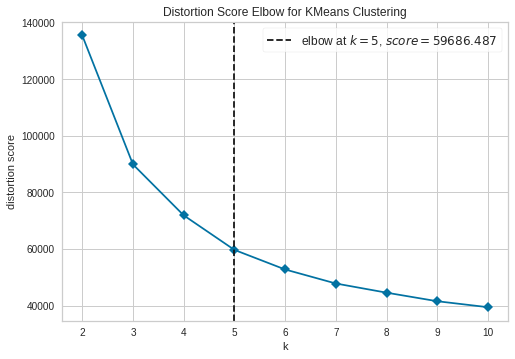

In [ ]:
plot_model(kmeans, plot = 'elbow')

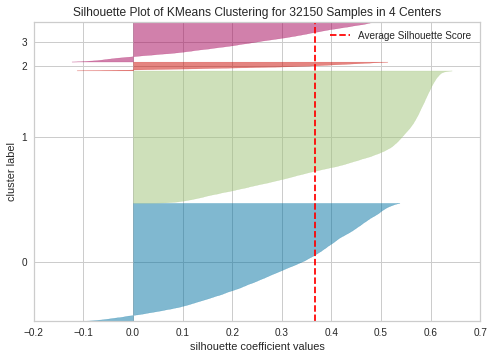

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
result = assign_model(kmeans)
result.head()

,Longitude,Latitude,SalePrice,total_tax,annual_insurance,annual_maintenance,LocationFactor,Cluster
0,-88.139859,42.152685,575000.0,6900.152425,3072.046129,14377.222425,2.222425,Cluster 3
1,-88.137325,42.152623,550000.0,5782.857888,2938.478906,13752.175888,2.175888,Cluster 3
2,-88.140675,42.152142,575000.0,6933.140308,3072.046129,14377.228308,2.228308,Cluster 3
3,-88.135220,42.152024,1150000.0,10741.840686,6144.092258,28752.128686,2.128686,Cluster 2
4,-88.133998,42.152193,455000.0,6191.409642,2430.923459,11377.109642,2.109642,Cluster 0


In [ ]:
predictions = predict_model(kmeans, data = data)
predictions.head()

,Longitude,Latitude,SalePrice,total_tax,annual_insurance,annual_maintenance,LocationFactor,Cluster
0,-88.139859,42.152685,575000.0,6900.152425,3072.046129,14377.222425,2.222425,Cluster 3
1,-88.137325,42.152623,550000.0,5782.857888,2938.478906,13752.175888,2.175888,Cluster 3
2,-88.140675,42.152142,575000.0,6933.140308,3072.046129,14377.228308,2.228308,Cluster 3
3,-88.135220,42.152024,1150000.0,10741.840686,6144.092258,28752.128686,2.128686,Cluster 2
4,-88.133998,42.152193,455000.0,6191.409642,2430.923459,11377.109642,2.109642,Cluster 0


In [ ]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [ ]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['

In [ ]:
from pycaret.anomaly import *

exp_ano101 = setup(predictions, normalize = True, 
                   ignore_features = ['Cluster'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(32150, 8)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(32150, 7)"
9,CPU Jobs,-1


In [ ]:
iforest = create_model('iforest')

In [ ]:
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
svm = create_model('svm', fraction = 0.025)

In [ ]:
print(svm)

OCSVM(cache_size=200, coef0=0.0, contamination=0.025, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Longitude,Latitude,SalePrice,total_tax,annual_insurance,annual_maintenance,LocationFactor,Cluster,Anomaly,Anomaly_Score
0,-88.139859,42.152685,575000.0,6900.152425,3072.046129,14377.222425,2.222425,Cluster 3,1,0.028348
1,-88.137325,42.152623,550000.0,5782.857888,2938.478906,13752.175888,2.175888,Cluster 3,1,0.022348
2,-88.140675,42.152142,575000.0,6933.140308,3072.046129,14377.228308,2.228308,Cluster 3,1,0.028348
3,-88.135220,42.152024,1150000.0,10741.840686,6144.092258,28752.128686,2.128686,Cluster 2,1,0.100481
4,-88.133998,42.152193,455000.0,6191.409642,2430.923459,11377.109642,2.109642,Cluster 0,1,0.015857


In [24]:
plot_model(iforest)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=tsne, plot_kwargs=None, save=False, scale=1, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=5)

INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0), transformation=True, score=False, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(32150, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Getting dummies to cast categorical variables
INFO:logs:Fitting TSNE()


KeyboardInterrupt: ignored

In [ ]:
plot_model(iforest, plot = 'umap')